In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [4]:
weather = pd.read_csv('./data/2000-01~2021-11m.csv', encoding='cp949') #불러오기

print(weather.head(263))
print(weather.dtypes)

      지점 지점명       일시  평균기온(°C)  평균최고기온(°C)  평균최저기온(°C)  최고기온(°C)  최저기온(°C)  \
0    108  서울  2000-01      -2.1         1.7        -5.7       9.9     -12.1   
1    108  서울  2000-02      -1.7         2.6        -5.8       7.5     -11.6   
2    108  서울  2000-03       6.3        11.4         1.7      18.9      -4.8   
3    108  서울  2000-04      11.9        16.9         7.3      23.5       1.8   
4    108  서울  2000-05      17.5        22.7        12.9      30.5       7.9   
..   ...  ..      ...       ...         ...         ...       ...       ...   
258  108  서울  2021-07      28.1        32.2        24.6      36.5      19.6   
259  108  서울  2021-08      25.9        29.7        22.8      33.7      18.1   
260  108  서울  2021-09      22.6        26.9        18.8      30.3      16.0   
261  108  서울  2021-10      15.6        20.5        11.6      28.8       1.3   
262  108  서울  2021-11       8.2        13.1         4.0      21.3      -3.7   

     최고기온 나타난날(yyyymmdd)  최저기온 나타난날(yyyymmdd)  
0  

In [5]:
weather['date'] = pd.to_datetime(weather['일시'], format='%Y-%m')
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month

train_year = weather.loc[:257,['일시','평균기온(°C)','평균최고기온(°C)','평균최저기온(°C)','month','year']]
test_year = weather.loc[258:,['일시','평균기온(°C)','평균최고기온(°C)','평균최저기온(°C)','month','year']]

In [6]:
print(train_year.head(263))
print(train_year.dtypes)

          일시  평균기온(°C)  평균최고기온(°C)  평균최저기온(°C)  month  year
0    2000-01      -2.1         1.7        -5.7      1  2000
1    2000-02      -1.7         2.6        -5.8      2  2000
2    2000-03       6.3        11.4         1.7      3  2000
3    2000-04      11.9        16.9         7.3      4  2000
4    2000-05      17.5        22.7        12.9      5  2000
..       ...       ...         ...         ...    ...   ...
253  2021-02       2.7         7.9        -2.2      2  2021
254  2021-03       9.0        14.8         4.3      3  2021
255  2021-04      14.2        19.5         9.5      4  2021
256  2021-05      17.1        21.9        12.8      5  2021
257  2021-06      22.8        27.6        18.9      6  2021

[258 rows x 6 columns]
일시             object
평균기온(°C)      float64
평균최고기온(°C)    float64
평균최저기온(°C)    float64
month           int64
year            int64
dtype: object


In [7]:
print(test_year.head(5))

          일시  평균기온(°C)  평균최고기온(°C)  평균최저기온(°C)  month  year
258  2021-07      28.1        32.2        24.6      7  2021
259  2021-08      25.9        29.7        22.8      8  2021
260  2021-09      22.6        26.9        18.8      9  2021
261  2021-10      15.6        20.5        11.6     10  2021
262  2021-11       8.2        13.1         4.0     11  2021


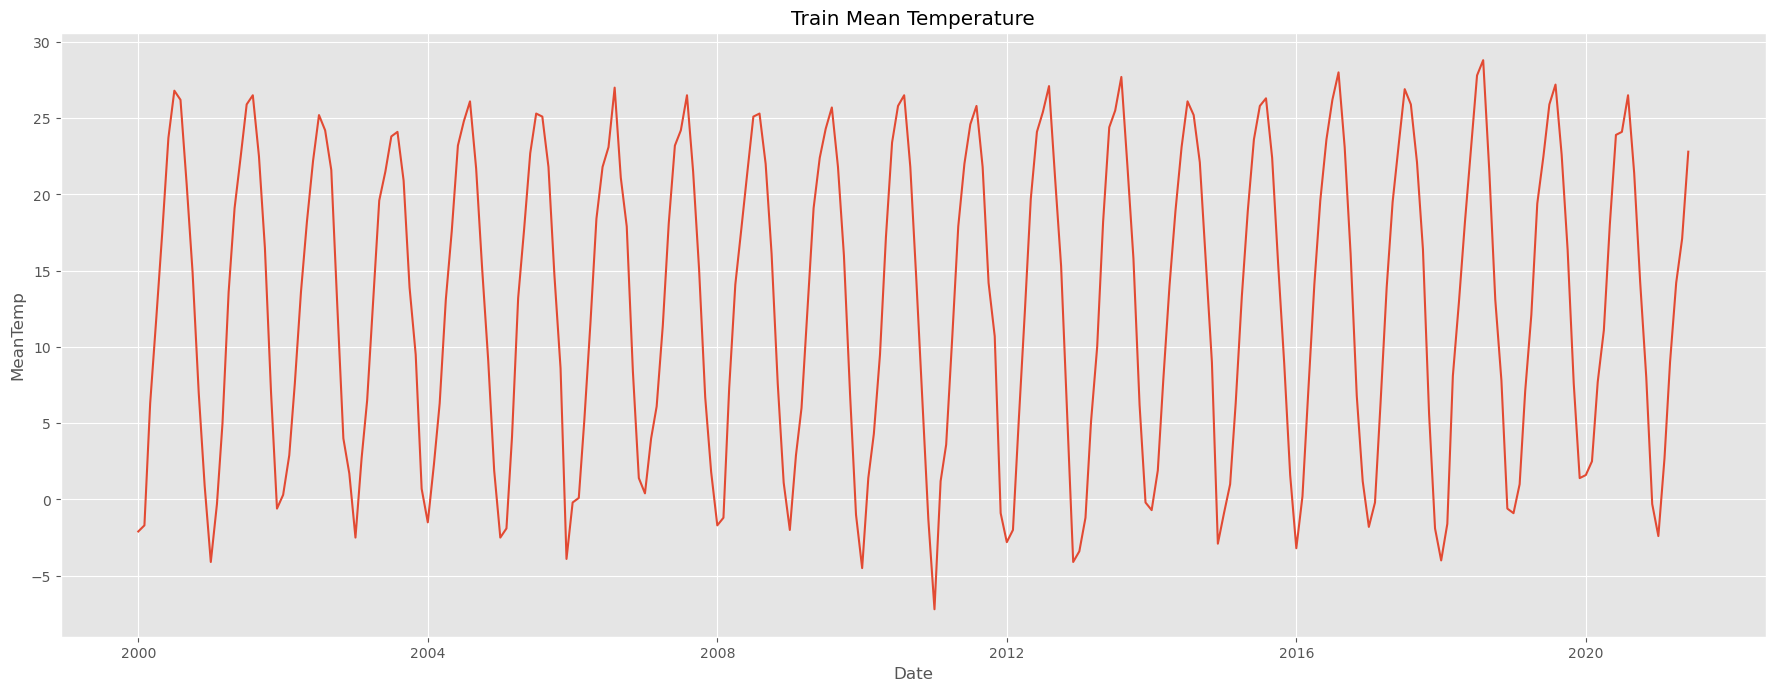

In [8]:
#train 데이터로 확인

train_year["trainDate"] = pd.to_datetime(train_year["일시"], format='%Y-%m')
train_year["MeanTemp"] = train_year['평균기온(°C)']
train_year["MaxTemp"] = train_year['평균최고기온(°C)']
train_year["MinTemp"] = train_year['평균최저기온(°C)']


test_year["trainDate"] = pd.to_datetime(test_year["일시"], format='%Y-%m')
test_year["MeanTemp"] = test_year['평균기온(°C)']
test_year["MaxTemp"] = test_year['평균최고기온(°C)']
test_year["MinTemp"] = test_year['평균최저기온(°C)']


plt.figure(figsize=(22, 8), dpi=100)
plt.plot(train_year.trainDate, train_year.MeanTemp)
plt.title("Train Mean Temperature")
plt.xlabel("Date")
plt.ylabel("MeanTemp")
plt.show()

In [9]:
timeSeries = train_year.loc[:,["trainDate","MeanTemp"]]
timeSeries.index = timeSeries.trainDate
ts = timeSeries.drop("trainDate",axis=1)

print(ts)

            MeanTemp
trainDate           
2000-01-01      -2.1
2000-02-01      -1.7
2000-03-01       6.3
2000-04-01      11.9
2000-05-01      17.5
...              ...
2021-02-01       2.7
2021-03-01       9.0
2021-04-01      14.2
2021-05-01      17.1
2021-06-01      22.8

[258 rows x 1 columns]


In [10]:
timeSeries_test = test_year.loc[:,["trainDate","MeanTemp"]]
timeSeries_test.index = timeSeries_test.trainDate
ts_test = timeSeries_test.drop("trainDate",axis=1)

print(ts_test)

            MeanTemp
trainDate           
2021-07-01      28.1
2021-08-01      25.9
2021-09-01      22.6
2021-10-01      15.6
2021-11-01       8.2


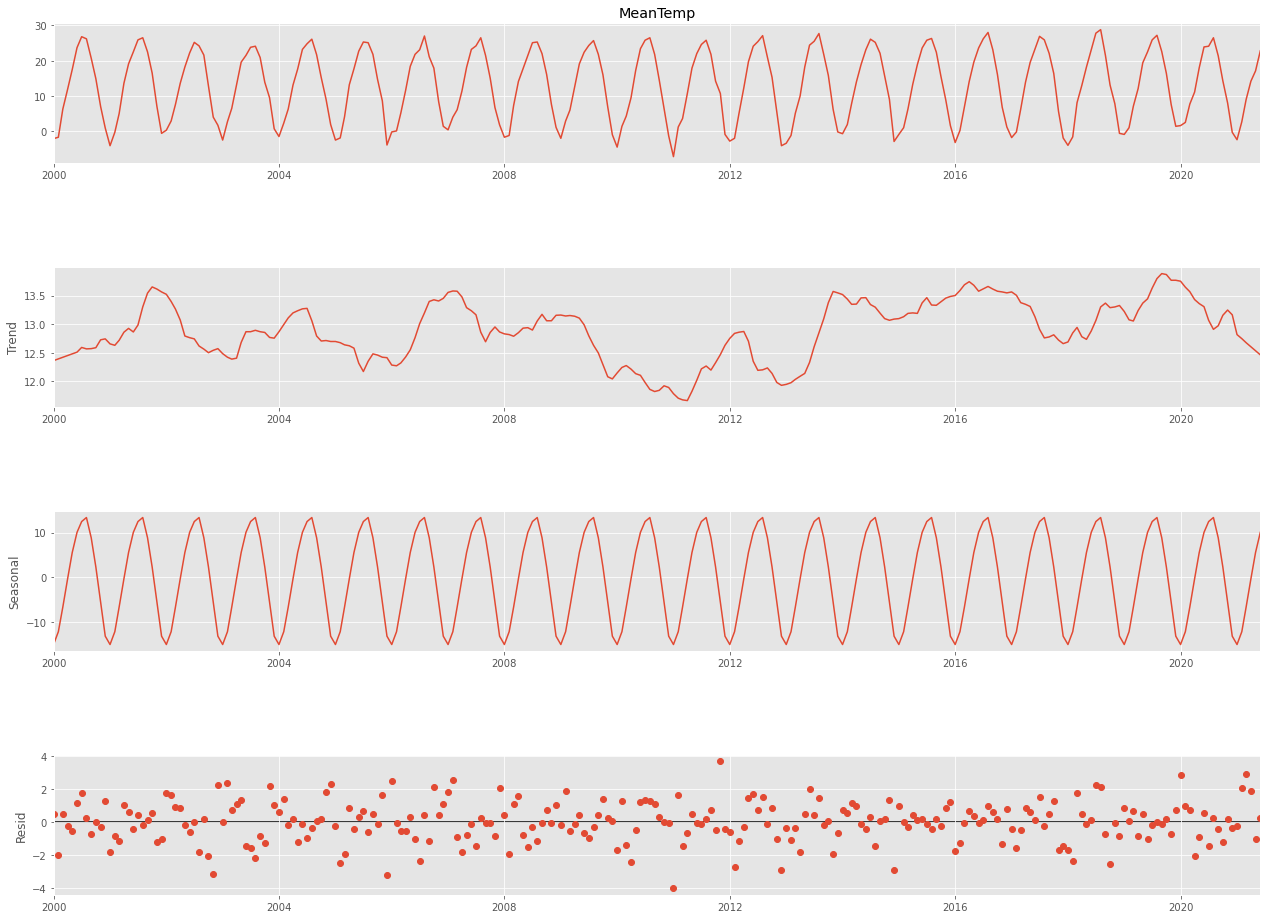

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['MeanTemp'], model='additive', period=12, extrapolate_trend='freq')
#result = seasonal_decompose(ts['MeanTemp'], model='additive', freq=12)

#fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 15)
#plt.plot((1,2,3))
#plt.show()

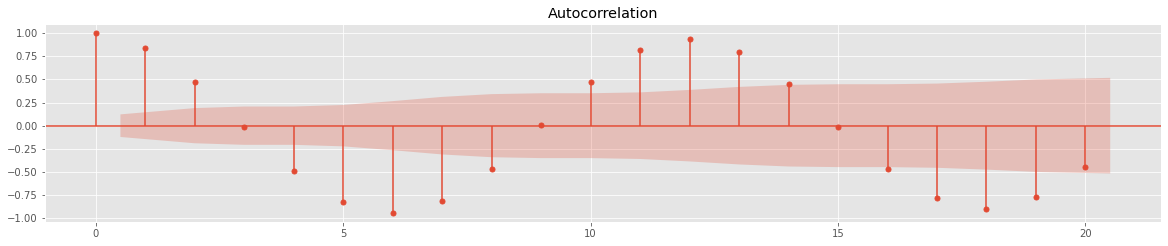

In [12]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)
#plt.plot((1,2,3))
#plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) # 0.009543 : 정상성 만족
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.609223
p-value: 0.005587
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


In [14]:
# ts_diff = ts - ts.shift() # 의미 없다

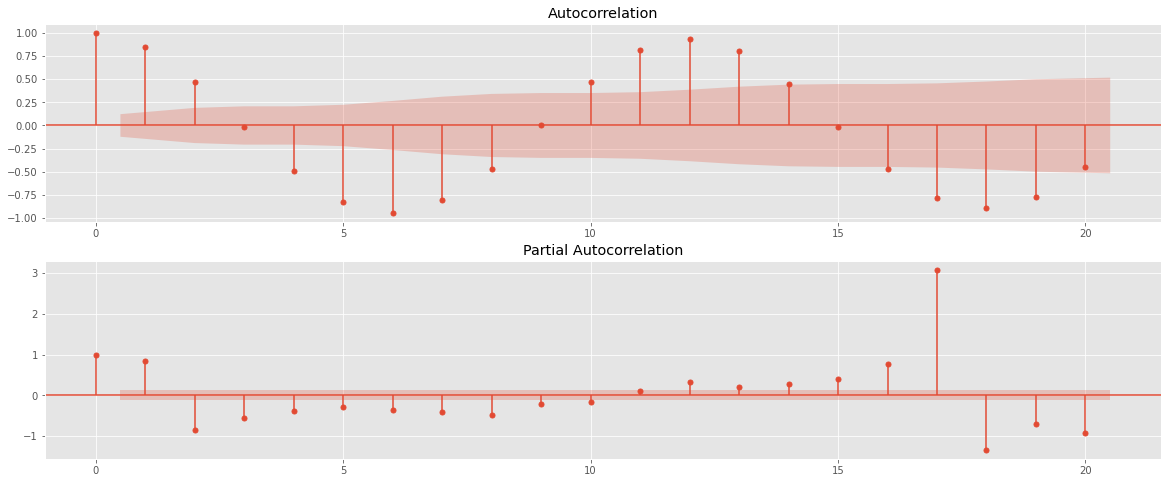

In [15]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts[:], lags=20, ax=ax1) # ax2 = fig.add_subplot(212)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts[:], lags=20, ax=ax2) # lags =40
#plt.plot((1,2,3))
#plt.show()

In [16]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

model = ARIMA(ts, order=(2,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:               MeanTemp   No. Observations:                  258
Model:                     ARMA(2, 2)   Log Likelihood                -512.210
Method:                       css-mle   S.D. of innovations              1.719
Date:                Wed, 05 Jan 2022   AIC                           1036.420
Time:                        10:02:55   BIC                           1057.738
Sample:                    01-01-2000   HQIC                          1044.992
                         - 06-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.9028      0.101    127.283      0.000      12.704      13.102
ar.L1.MeanTemp     1.7320      0.000   5822.810      0.000       1.731       1.733
ar.L2.MeanTemp    -1.0000   9.53e-05

In [17]:
start_index = datetime(2018, 1, 1)
end_index = datetime(2021, 6, 1)

forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

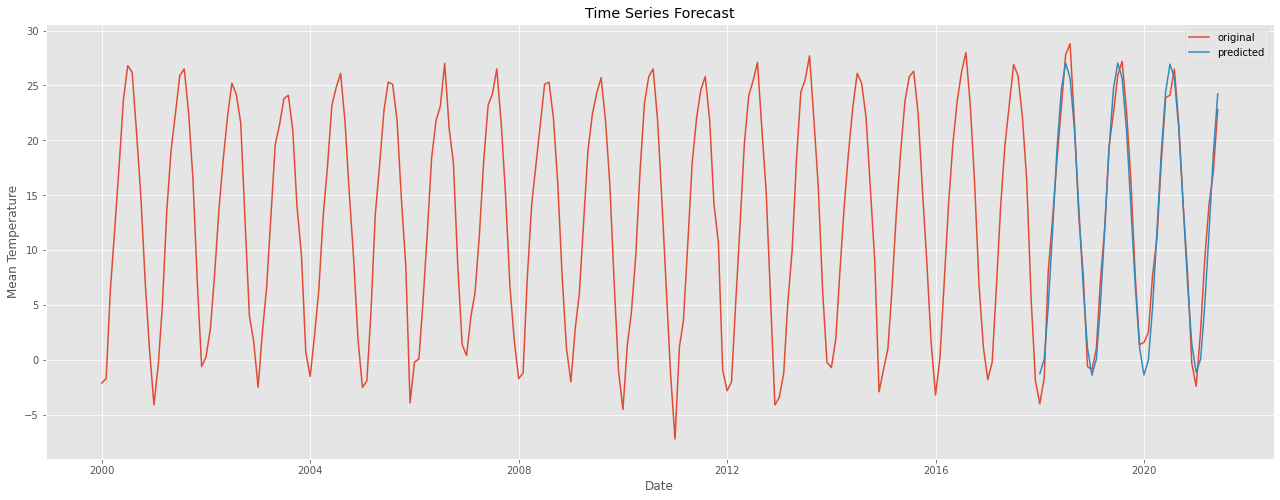

In [18]:
plt.figure(figsize=(22,8))
plt.plot(train_year.trainDate,train_year.MeanTemp, label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

In [19]:
from sklearn import metrics

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    corr = round(np.corrcoef(y_true, y_pred)[0,1], 3)
    mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_absolute_percentage_error(y_true, y_pred), 3)
    df = pd.DataFrame({'R2':r2, 'Corr':corr, 'RMSE':rmse, 'MAPE':mape}, index=[0])
    return df

In [20]:
scoring(np.array(train_year[train_year.trainDate >= start_index].MeanTemp), np.array(forecast))

,R2,Corr,RMSE,MAPE
0,96.506,0.984,0.472,47.196


In [21]:
forecast_data = model_fit.forecast(steps=12) # steps 값이 향후 예측하고자하는 값.
print(forecast_data)

(array([26.68331332, 25.4804414 , 20.90763859, 14.19017605,  7.12792565,
        1.61310367, -0.87671812,  0.32550565,  4.89758656, 11.61444687,
       18.67637606, 24.19124392]), array([1.71895308, 1.71904784, 1.71908602, 1.71950364, 1.72035695,
       1.72126636, 1.72179647, 1.72189111, 1.72192919, 1.72234599,
       1.72319775, 1.72410558]), array([[23.3142272 , 30.05239944],
       [22.11116954, 28.84971326],
       [17.53829189, 24.27698528],
       [10.82001084, 17.56034125],
       [ 3.75608799, 10.49976331],
       [-1.7605164 ,  4.98672374],
       [-4.25137719,  2.49794094],
       [-3.04933891,  3.70035021],
       [ 1.52266736,  8.27250577],
       [ 8.23871075, 14.99018299],
       [15.29897054, 22.05378158],
       [20.81205908, 27.57042876]]))


In [22]:
pred_y = forecast_data[0].tolist()
test_y = timeSeries_test.MeanTemp.values

In [23]:
# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []

# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

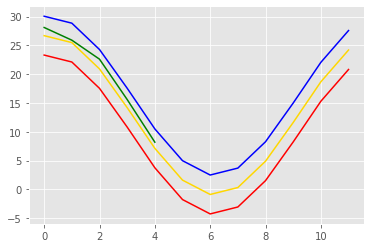

In [24]:
# 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

In [25]:
print(ts_test)

            MeanTemp
trainDate           
2021-07-01      28.1
2021-08-01      25.9
2021-09-01      22.6
2021-10-01      15.6
2021-11-01       8.2


In [26]:
print(pred_y)

[26.68331331915961, 25.480441400606946, 20.90763858928528, 14.190176048493422, 7.127925652763752, 1.6131036685998317, -0.8767181220944944, 0.3255056488998709, 4.897586560393258, 11.614446871282993, 18.6763760618901, 24.1912439215778]


In [27]:
#===========예측날씨 데이터프레임===============================

In [34]:
predWeather = pd.DataFrame({
    '일시' : ["2021-07","2021-08","2021-09","2021-10","2021-11","2021-12","2022-01","2022-02","2022-03","2022-04","2022-05","2022-06"]
})


predWeather['평균기온(°C)'] = pred_y
predWeather['평균최고기온(°C)'] = pred_y_upper
predWeather['평균최저기온(°C)'] = pred_y_lower

print(predWeather)

predWeather.to_csv('predict_weather.csv', header=True,index=False)

         일시   평균기온(°C)  평균최고기온(°C)  평균최저기온(°C)
0   2021-07  26.683313   30.052399   23.314227
1   2021-08  25.480441   28.849713   22.111170
2   2021-09  20.907639   24.276985   17.538292
3   2021-10  14.190176   17.560341   10.820011
4   2021-11   7.127926   10.499763    3.756088
5   2021-12   1.613104    4.986724   -1.760516
6   2022-01  -0.876718    2.497941   -4.251377
7   2022-02   0.325506    3.700350   -3.049339
8   2022-03   4.897587    8.272506    1.522667
9   2022-04  11.614447   14.990183    8.238711
10  2022-05  18.676376   22.053782   15.298971
11  2022-06  24.191244   27.570429   20.812059
